In [1]:
#必要なライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#データのインポート
Players=pd.read_csv("NBA_height_weight.csv")

In [3]:
#要約統計量の確認
Players.describe()

,Weight,Height(cm),Weight(kg)
count,540.000000,540.000000,540.000000
mean,216.583333,201.907422,98.220542
std,24.791646,9.475605,11.243011
min,160.000000,179.832000,72.560000
25%,198.000000,195.072000,89.793000
50%,215.000000,201.168000,97.502500
75%,234.000000,210.312000,106.119000
max,311.000000,228.600000,141.038500


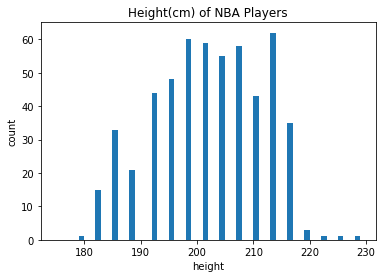

In [4]:
#身長のヒストグラムを描写する
haba=range(175,230,1)
plt.hist(Players["Height(cm)"],bins=haba)
plt.title("Height(cm) of NBA Players")
plt.ylabel("count")
plt.xlabel("height")
plt.show()
#6フィート(183cm)と7フィート(213cm)の度数が多い？

In [5]:
#体重を身長で説明する回帰モデルを立てる
model=LinearRegression()
Y=Players[["Weight(kg)"]]
X=Players[["Height(cm)"]]
model.fit(X,Y)

LinearRegression()

In [6]:
#予測値をデータフレームに追加する
Players["pred"]=model.predict(X)

In [7]:
#残差をデータフレームに追加する
res=[]
for w,p in zip(Players["Weight(kg)"],Players["pred"]):
    res.append(w-p)
    
Players["res"]=pd.Series(res)

In [17]:
#残差の大きい（身長の割に体重が重い）選手TOP25を表示する
Players.sort_values("res",ascending=False).head(25).loc[:,["Name","Height(cm)","Weight(kg)"]]

,Name,Height(cm),Weight(kg)
539,Zion Williamson,204.216,128.7940
245,Jaylen Adams,182.880,102.0375
288,Jusuf Nurkic,216.408,131.5150
51,Brook Lopez,213.360,127.8870
442,Robin Lopez,213.360,127.4335
477,Tacko Fall,228.600,141.0385
239,Jarrell Brantley,198.120,113.3750
260,Joel Embiid,213.360,126.9800
519,Udoka Azubuike,213.360,126.9800
163,Eric Paschall,201.168,115.6425


In [16]:
#残差の小さい（身長の割に体重が軽い）選手TOP25を表示する
Players.sort_values("res").head(25).loc[:,["Name","Height(cm)","Weight(kg)"]]

,Name,Height(cm),Weight(kg)
8,Aleksej Pokusevski,213.360,86.1650
217,Jaden McDaniels,210.312,83.8975
202,Isaac Bonga,207.264,81.6300
273,Josh Hall,210.312,86.1650
415,Patrick McCaw,204.216,82.0835
318,Kostas Antetokounmpo,213.360,90.7000
205,Isaiah Joe,195.072,74.8275
120,Deividas Sirvydis,207.264,86.1650
48,Brandon Ingram,207.264,86.1650
462,Shai Gilgeous-Alexander,201.168,81.6300


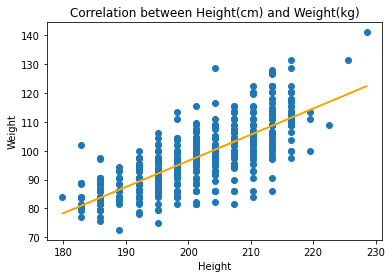

In [10]:
#回帰直線入りの散布図を描写する
plt.plot(X,Y,"o")
plt.plot(X,model.predict(X),color="orange")
plt.title("Correlation between Height(cm) and Weight(kg)")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [11]:
#データフレームにBMIを追加する
bmi=[]
for h,w in zip(Players["Height(cm)"],Players["Weight(kg)"]):
    bmi.append(w/((h/100)**2))
    
Players["BMI"]=pd.Series(bmi)

In [15]:
#BMIの高い選手TOP25を表示する
Players.sort_values("BMI",ascending=False).head(25).loc[:,["Name","Height(cm)","Weight(kg)","BMI"]]

,Name,Height(cm),Weight(kg),BMI
539,Zion Williamson,204.216,128.7940,30.882760
245,Jaylen Adams,182.880,102.0375,30.508959
239,Jarrell Brantley,198.120,113.3750,28.884221
163,Eric Paschall,201.168,115.6425,28.575884
409,P.J. Tucker,198.120,111.1075,28.306537
142,Donovan Mitchell,185.928,97.5025,28.205003
51,Brook Lopez,213.360,127.8870,28.093147
288,Jusuf Nurkic,216.408,131.5150,28.082041
161,Eric Bledsoe,185.928,97.0490,28.073817
442,Robin Lopez,213.360,127.4335,27.993526


In [14]:
#BMIの低い選手TOP25を表示する
Players.sort_values("BMI").head(25).loc[:,["Name","Height(cm)","Weight(kg)","BMI"]]

,Name,Height(cm),Weight(kg),BMI
8,Aleksej Pokusevski,213.360,86.1650,18.928007
217,Jaden McDaniels,210.312,83.8975,18.967973
202,Isaac Bonga,207.264,81.6300,19.002120
273,Josh Hall,210.312,86.1650,19.480620
205,Isaiah Joe,195.072,74.8275,19.663977
415,Patrick McCaw,204.216,82.0835,19.682322
318,Kostas Antetokounmpo,213.360,90.7000,19.924218
48,Brandon Ingram,207.264,86.1650,20.057793
120,Deividas Sirvydis,207.264,86.1650,20.057793
282,Justin Holiday,201.168,81.6300,20.171212
